In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("amazon_sales_dataset.csv")
df.head()

In [3]:
print(df.isna())

       order_id  order_date  product_id  product_category  price  \
0         False       False       False             False  False   
1         False       False       False             False  False   
2         False       False       False             False  False   
3         False       False       False             False  False   
4         False       False       False             False  False   
...         ...         ...         ...               ...    ...   
49995     False       False       False             False  False   
49996     False       False       False             False  False   
49997     False       False       False             False  False   
49998     False       False       False             False  False   
49999     False       False       False             False  False   

       discount_percent  quantity_sold  customer_region  payment_method  \
0                 False          False            False           False   
1                 False          

In [4]:
print(df.isna().sum())

order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64


In [5]:
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [6]:
print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (50000, 13) 

number of rows:  50000
number of columns:  13


In [7]:
df.dtypes

order_id              int64
order_date              str
product_id            int64
product_category        str
price               float64
discount_percent      int64
quantity_sold         int64
customer_region         str
payment_method          str
rating              float64
review_count          int64
discounted_price    float64
total_revenue       float64
dtype: object

In [8]:
df.dtypes
df['total_revenue'] = pd.to_numeri(df['total_revenue'])
df.dtypes

order_id              int64
order_date              str
product_id            int64
product_category        str
price               float64
discount_percent      int64
quantity_sold         int64
customer_region         str
payment_method          str
rating              float64
review_count          int64
discounted_price    float64
total_revenue       float64
dtype: object

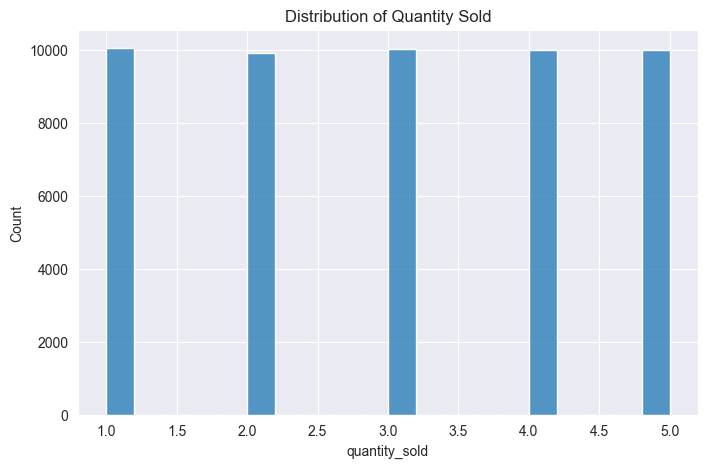

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['quantity_sold'], bins=20)
plt.title("Distribution of Quantity Sold")
plt.show()

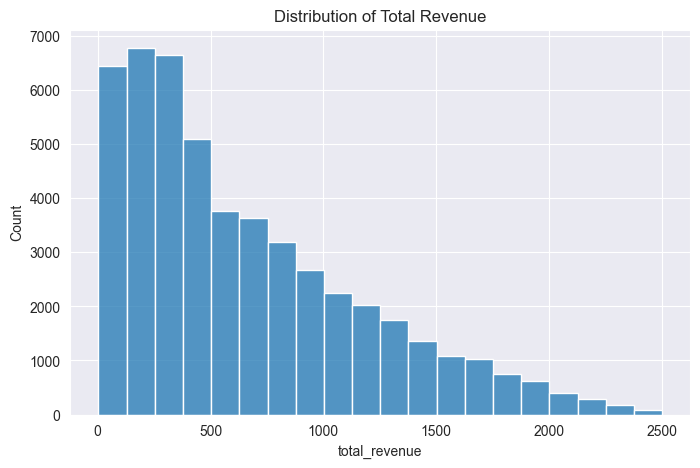

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_revenue'], bins=20)
plt.title("Distribution of Total Revenue")
plt.show()

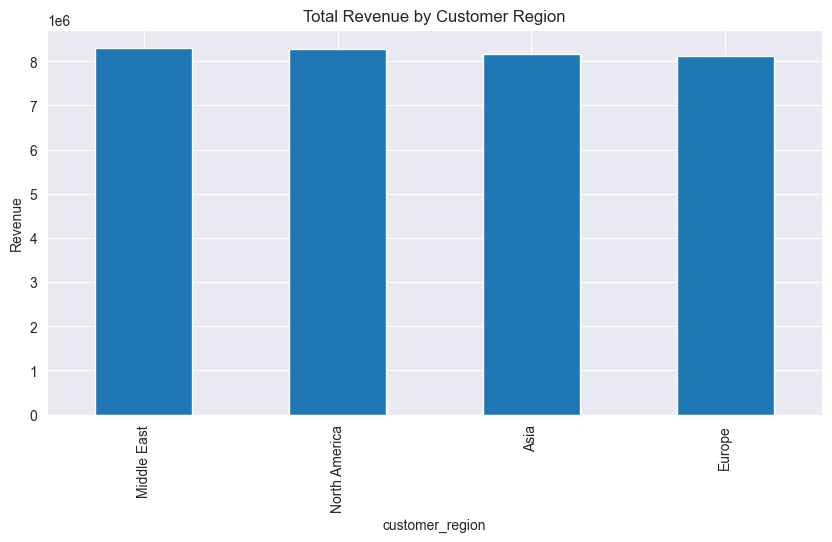

customer_region
Middle East      8301844.50
North America    8277217.84
Asia             8175199.83
Europe           8112311.57
Name: total_revenue, dtype: float64

In [11]:
region_revenue = df.groupby('customer_region')['total_revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
region_revenue.plot(kind='bar')
plt.title("Total Revenue by Customer Region")
plt.ylabel("Revenue")
plt.show()

region_revenue

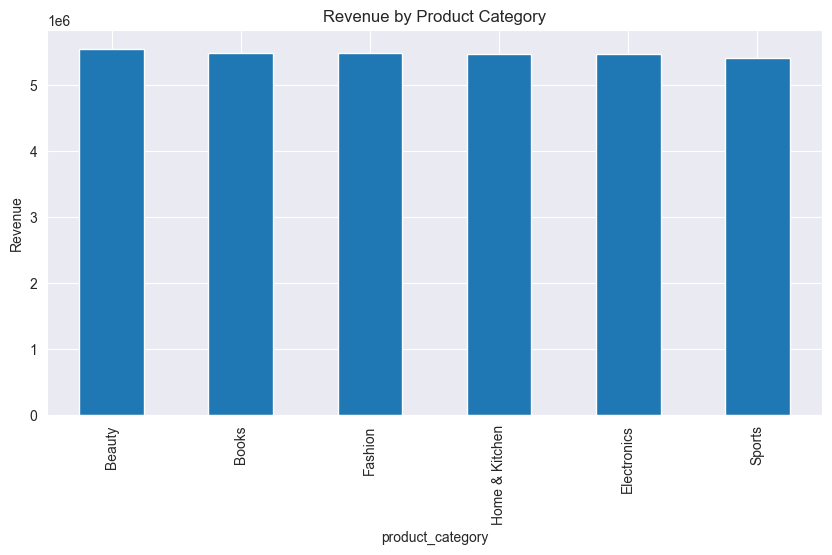

product_category
Beauty            5550624.97
Books             5484863.03
Fashion           5480123.34
Home & Kitchen    5473132.55
Electronics       5470594.03
Sports            5407235.82
Name: total_revenue, dtype: float64

In [13]:
product_revenue = df.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind='bar')
plt.title("Revenue by Product Category")
plt.ylabel("Revenue")
plt.show()
product_revenue

In [14]:
payment_method_revenue = df.groupby('payment_method')['total_revenue'].sum().sort_values(ascending=False)

payment_method_revenue.head(10)

payment_method
Wallet              6678638.47
UPI                 6579441.44
Cash on Delivery    6546386.94
Credit Card         6540087.16
Debit Card          6522019.73
Name: total_revenue, dtype: float64

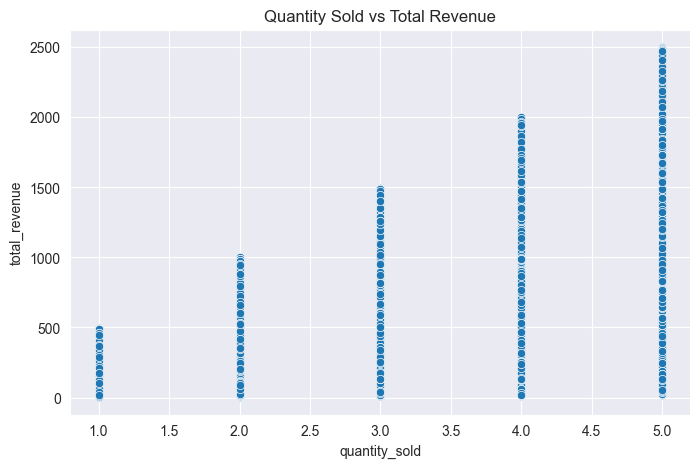

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='quantity_sold', y='total_revenue', data=df)
plt.title("Quantity Sold vs Total Revenue")
plt.show()

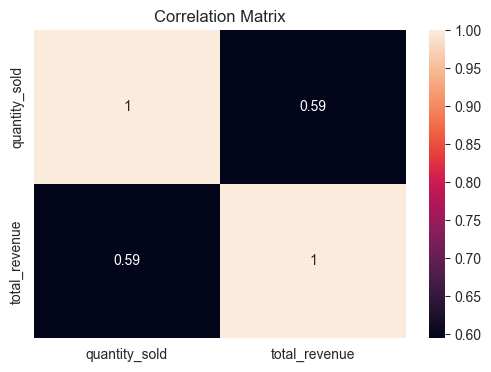

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['quantity_sold', 'total_revenue']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

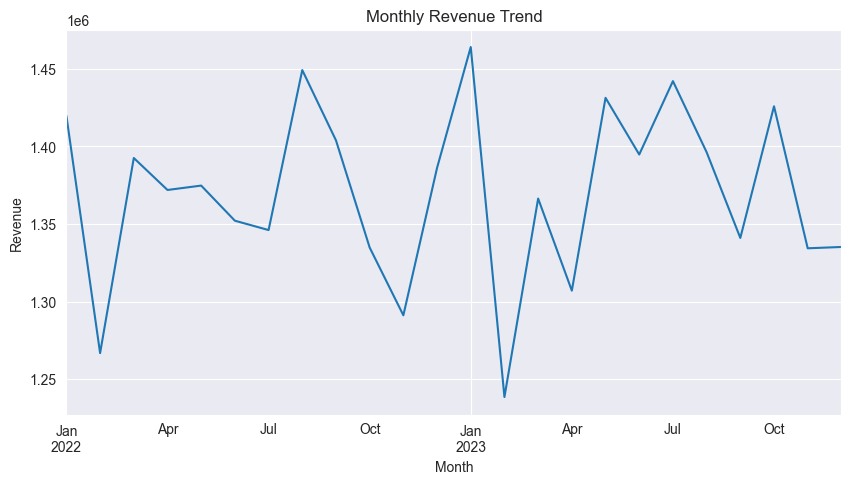

In [18]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['Month'] = df['order_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['total_revenue'].sum()
plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()